In [1]:
# Importer les packages nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Importer les packages machine learning
!pip install graphviz
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, classification_report
from xgboost import XGBClassifier
import xgboost as xgb

In [3]:
# Importer la base de données
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
# Création du dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [5]:
# Affichage du dataframe
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


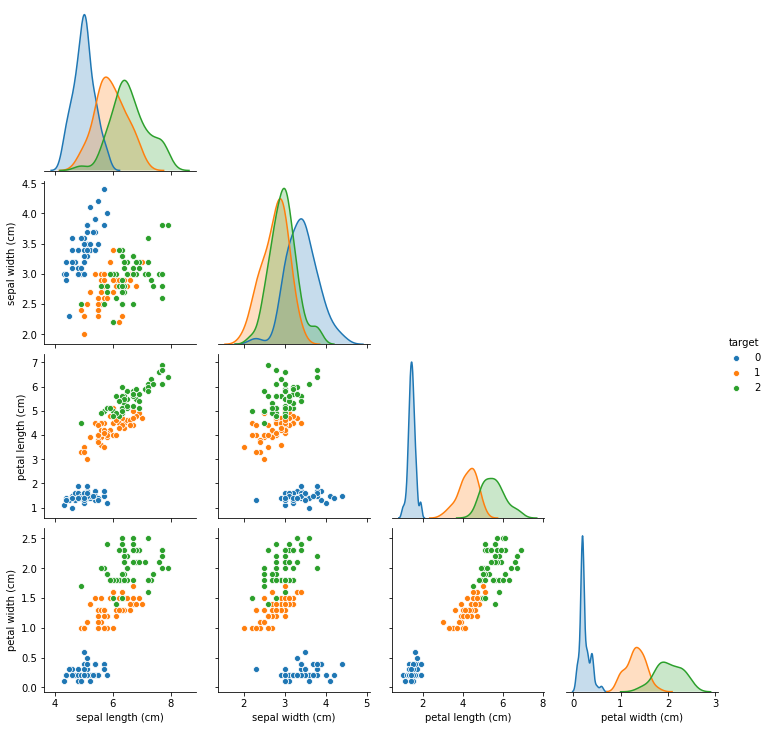

In [6]:
# Vision générale sur dataframe
sns.pairplot(df, corner = True, hue ='target', vars=iris['feature_names'])

In [7]:
# Séparation du jeu de données entre les datas et les targets
X = df.iloc[:, 0:-1]
y = df.iloc[:,-1]

In [8]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
# Création du model
model = XGBClassifier()

In [10]:
# Préparer les données d'entrainement et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 0)

In [11]:
# Appliquer le modèle
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [12]:
# Vérifier la précision méthod 2
print(model.score(X_test, y_test))

0.9333333333333333


In [13]:
# Vérifier tuus les metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.88      0.97      0.92        30
           2       0.95      0.83      0.89        24

    accuracy                           0.93        75
   macro avg       0.94      0.93      0.94        75
weighted avg       0.94      0.93      0.93        75



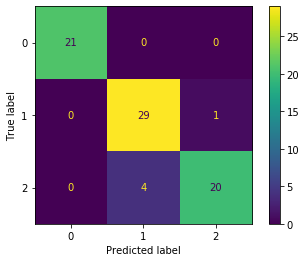

In [14]:
# Matrice de correlation
plot_confusion_matrix(model, X_test, y_test)
plt.show()

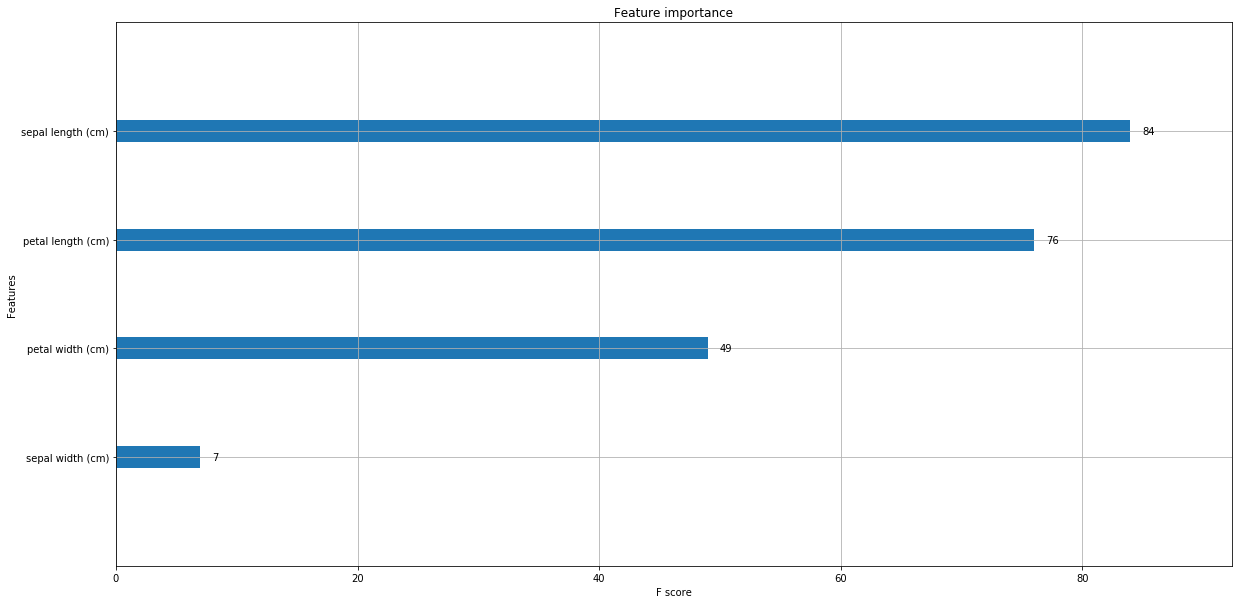

In [15]:
# Visualisation de l'importance des features d'entrées sur la prédiction 
plt.rcParams["figure.figsize"] = (20, 10)
xgb.plot_importance(model)

In [16]:
# Importance des features d'entrées sur la prédiction
pd.DataFrame(list(model.get_booster().get_fscore().items()),
columns=['feature','importance']).sort_values('importance', ascending=False)

,feature,importance
3,sepal length (cm),84
0,petal length (cm),76
2,petal width (cm),49
1,sepal width (cm),7


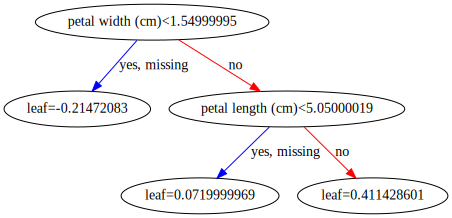

In [17]:
xgb.to_graphviz(model, num_trees=2)